# Pryngles module: stars

In [1]:
from pryngles import *

## External modules

In [29]:
sci=Science
print_df=Misc.print_df

## Star Class

In [22]:
class StarDefaults(object):
    """
    These are the default attributes for bodies of the kind 'Star'.
    
    DEVELOPER:
        You may add new attributes as the model gets more complex.
        Please document properly each attribute.

    """
    orbit=dict(
        m=1,
    )
    physics=dict(
        radius=1,
        prot=1,
        i=0,#Inclination of the rotational axis
        roll=0,
        alpha=0,#Zero meridian
        t0=0,
    )
    optics=dict(
        nspangles=1000,
        limb_coeffs=[],
    )

In [23]:
BODY_KINDS+=["Star"]
class Star(Body):
    """A star.

    Initialization attributes:
        
        primary: Class Body, default = None:
            Object in the center of the orbit of the star for specification purposes.
            If None the object is the center of the orbit specification for other objects.
        
        orbit:

            These attributes should be compatible with rebound.

            m: float [um], default = 1: 
                Mass of the star. It should be different than zero.

        physics:

            radius: float [ul], default = 1:
                Radius of the star.

            prot: float [ut], default = 1:
                Period of rotation of the star.
                
            i: float [rad], default = 0:
                Inclination of the ring with respect to the ecliptic plane.

            roll: float [rad], default = 0:
                Roll angle.  This is the angle with respect to ecliptic x-axis in which 
                the normal to the ring plane is rotated.
                
            alpha_equ: float [rad], default = 0:
                Longitude of the zero meridian of the object.
                
            t0: float [ut], default = 0:
                Initial time for zero meridian.

        optics:

            limb_coeffs: list [adimensional], default = []
                List of limb darkening fit coefficients.  See Science.calc_limbdarkening.
                
                Models in: https://pages.jh.edu/~dsing3/David_Sing/Limb_Darkening.html
                Coefficients available at: https://pages.jh.edu/~dsing3/LDfiles/LDCs.CoRot.Table1.txt

            nspangles: int, default = 1000:

                Number of spangles on which the star will be discretized.

    Derived attributes:
    
        physics:
            
            wrot: float [rad/ut]:
                Rotational angular velocity.
                
            n_equ: array(3):
                Rotational axis vector.
    
    Methods:
    
        update_body(**pars):

            This method compute some derived attributes like.

    Notes:

        See Body class documentation.
    
    """
    def __init__(self,
                 primary=None,
                 orbit=StarDefaults.orbit,
                 physics=StarDefaults.physics,
                 optics=StarDefaults.optics
                ):
        
        
        #Instantiate object with basic properties
        Body.__init__(self,StarDefaults,"Star",primary,orbit,physics,optics)

        #Check primary
        if self.primary is not None:
            if self.primary.kind=="Planet":
                raise ValueError(f"Planet cannot be the primary of a Star")
                
        #Update properties
        self.update_body(**self.__dict__)
        
    def update_body(self,**pars):
        Body.update_body(self,**pars)
        
        #Update physics
        
        #Rotational angular velocity
        self.physics.wrot=2*np.pi/self.physics.prot
        
        #Rotation axis:
        self.physics.n_equ=sci.cartesian([1,self.physics.roll,90*Consts.deg-self.physics.i])

In [24]:
if IN_JUPYTER:
    def test_star(self):
        S=Star()
        print(S.physics)
        print(S.hash)
        
        #Check derived properties
        self.assertEqual(np.isclose([S.physics.wrot],
                                    [2*np.pi/StarDefaults.physics["prot"]],
                                    rtol=1e-7),
                         [True]*1)
        
        S.update_body(physics=dict(m=2))
        print(S.physics)
        
        #Check exception: primary could not be different from None or Body
        self.assertRaises(AssertionError,lambda:Star(primary="Nada"))
        
    class Test(unittest.TestCase):pass    
    Test.test_star=test_star
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

.

{'radius': 1, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 't0': 0, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00])}
8780141327240
{'radius': 1, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 't0': 0, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00]), 'm': 2}



----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [48]:
def spangle_body(self,seed=0):
    """
    Spangle the surface of the star
    """
    
    #Create spangler
    self.sp=Spangler(
        nspangles=self.optics.nspangles,
        body_hash=self.hash,
        spangle_type=STAR_SPANGLE,
        n_equ=self.physics.n_equ,
        alpha_equ=self.physics.alpha,
        w_equ=self.physics.wrot,
        t0_equ=self.physics.t0,
    )
    
    #Populate spangler
    self.sp.populate_spangler(
        scale=self.physics.radius,
        seed=seed,
        geometry="sphere",        
    )

Star.spangle_body=spangle_body

,body_hash,type,dim,scale,center_ecl,x_ecl,y_ecl,z_ecl,r_ecl,q_ecl,f_ecl,ns_ecl,x_obs,y_obs,z_obs,r_obs,q_obs,f_obs,ns_obs,x_luz,y_luz,z_luz,r_luz,q_luz,f_luz,ns_luz,n_equ,alpha_equ,center_equ,x_equ,y_equ,z_equ,r_equ,q_equ,f_equ,ns_equ,w,t0,asp,dsp,albedo_gray_normal,tau_gray_optical,unset,visible,shadow,illuminated,transit,indirect,occult,emit,hidden
982,8780088276827,3,3,1,"[0, 0, 0]",-0.122222,-0.054596,0.991,1.0,3.561691,1.436531,"[-0.1222224385605729, -0.05459556311923862, 0.9910000000000001]",-0.122222,-0.054596,0.991,1.0,3.561691,1.436531,"[-0.1222224385605729, -0.05459556311923862, 0.9910000000000001]",-0.122222,-0.054596,0.991,1.0,3.561691,1.436531,"[-0.1222224385605729, -0.05459556311923862, 0.9910000000000001]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",-0.054596,0.122222,0.991,1.0,1.990894,1.436531,"[-0.05459556311923862, 0.12222243856057295, 0.9910000000000001]",0,0,0.012732,0.127321,1,0.0,0,1,0,1,0,0,0,0,0
983,8780088276827,3,3,1,"[0, 0, 0]",0.112061,-0.037326,0.993,1.0,5.961654,1.452406,"[0.11206129711517777, -0.03732647436959037, 0.9930000000000001]",0.112061,-0.037326,0.993,1.0,5.961654,1.452406,"[0.11206129711517777, -0.03732647436959037, 0.9930000000000001]",0.112061,-0.037326,0.993,1.0,5.961654,1.452406,"[0.11206129711517777, -0.03732647436959037, 0.9930000000000001]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",-0.037326,-0.112061,0.993,1.0,4.390858,1.452406,"[-0.03732647436959037, -0.11206129711517772, 0.9930000000000001]",0,0,0.012732,0.127321,1,0.0,0,1,0,1,0,0,0,0,0
984,8780088276827,3,3,1,"[0, 0, 0]",-0.048550,0.087280,0.995,1.0,2.078432,1.470755,"[-0.04855043027610256, 0.08728032836788042, 0.9950000000000001]",-0.048550,0.087280,0.995,1.0,2.078432,1.470755,"[-0.04855043027610256, 0.08728032836788042, 0.9950000000000001]",-0.048550,0.087280,0.995,1.0,2.078432,1.470755,"[-0.04855043027610256, 0.08728032836788042, 0.9950000000000001]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",0.087280,0.048550,0.995,1.0,0.507636,1.470755,"[0.08728032836788042, 0.048550430276102625, 0.9950000000000001]",0,0,0.012732,0.127321,1,0.0,0,1,0,1,0,0,0,0,0
985,8780088276827,3,3,1,"[0, 0, 0]",-0.017947,-0.075292,0.997,1.0,4.478395,1.493317,"[-0.017946663707989526, -0.07529221249074883, 0.9970000000000001]",-0.017947,-0.075292,0.997,1.0,4.478395,1.493317,"[-0.017946663707989526, -0.07529221249074883, 0.9970000000000001]",-0.017947,-0.075292,0.997,1.0,4.478395,1.493317,"[-0.017946663707989526, -0.07529221249074883, 0.9970000000000001]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",-0.075292,0.017947,0.997,1.0,2.907599,1.493317,"[-0.07529221249074883, 0.01794666370798959, 0.9970000000000001]",0,0,0.012732,0.127321,1,0.0,0,1,0,1,0,0,0,0,0
986,8780088276827,3,3,1,"[0, 0, 0]",0.037022,0.025067,0.999,1.0,0.595173,1.526071,"[0.037022329898945286, 0.025066852392221433, 0.9990000000000001]",0.037022,0.025067,0.999,1.0,0.595173,1.526071,"[0.037022329898945286, 0.025066852392221433, 0.9990000000000001]",0.037022,0.025067,0.999,1.0,0.595173,1.526071,"[0.037022329898945286, 0.025066852392221433, 0.9990000000000001]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",0.025067,-0.037022,0.999,1.0,5.307562,1.526071,"[0.025066852392221433, -0.037022329898945223, 0.9990000000000001]",0,0,0.012732,0.127321,1,0.0,0,1,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>


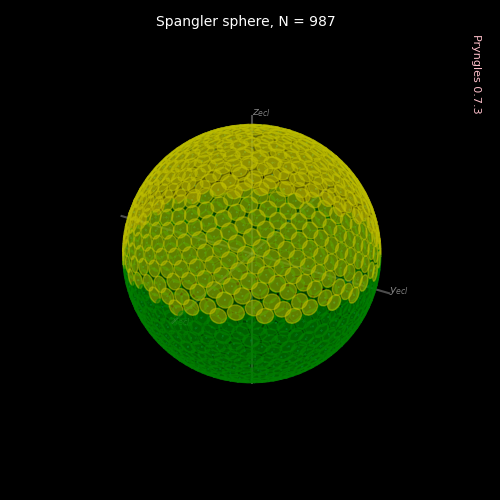

.
----------------------------------------------------------------------
Ran 1 test in 1.471s

OK


In [47]:
if IN_JUPYTER:
    def test_sp(self):
        S=Star()
        S.spangle_body()
        print_df(S.sp.data.tail())
        S.sp.plot3d()
        
    class Test(unittest.TestCase):pass    
    Test.test_sp=test_sp
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

--End--